## Deep Learning Challenge

### Loading the CIFAR10 data
The data can be loaded directly from keras (`keras.datasets.cifar10`).

```python
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
```

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import visualkeras
# from tensorflow.keras.preprocessing.

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [8]:
indices = [np.where(train_labels==i)[0][j] for i in range(10) for j in range(10)]

In [15]:
indices

[29,
 30,
 35,
 49,
 77,
 93,
 115,
 116,
 129,
 165,
 4,
 5,
 32,
 44,
 45,
 46,
 60,
 61,
 64,
 65,
 6,
 13,
 18,
 24,
 41,
 42,
 47,
 48,
 54,
 55,
 9,
 17,
 21,
 26,
 33,
 36,
 38,
 39,
 59,
 74,
 3,
 10,
 20,
 28,
 34,
 58,
 66,
 82,
 86,
 89,
 27,
 40,
 51,
 56,
 70,
 81,
 83,
 107,
 128,
 148,
 0,
 19,
 22,
 23,
 25,
 72,
 95,
 103,
 104,
 117,
 7,
 11,
 12,
 37,
 43,
 52,
 68,
 73,
 84,
 85,
 8,
 62,
 69,
 92,
 100,
 106,
 111,
 135,
 139,
 155,
 1,
 2,
 14,
 15,
 16,
 31,
 50,
 53,
 67,
 71]

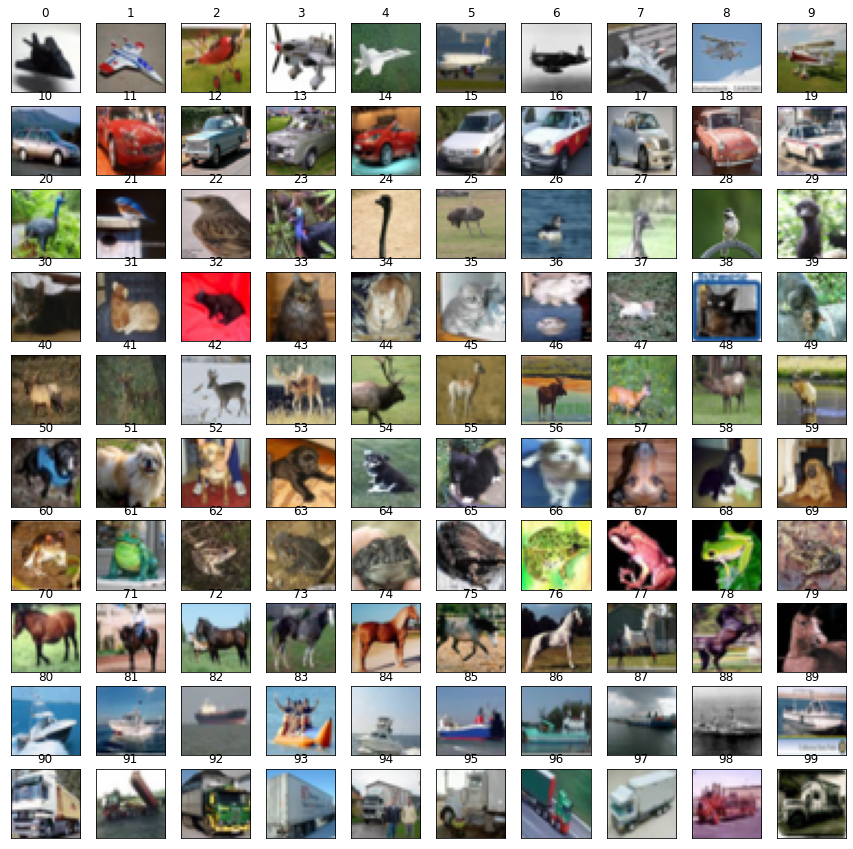

In [16]:
plt.figure(figsize=(15, 15))
for i in range(len(indices)):
    plt.subplot(10, 10, 1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indices[i]].reshape(32, 32, 3))
    plt.title(i)
plt.show()

#### Task: Build a convulution neural network (CNN) to predict the object in the images. 

Try to do it on your own first before consulting with peers or tutorials on the internet. If you are stuck early, reach out to a mentor who will point you in the right direction.

In [19]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [29]:
clf = Sequential()
clf.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
clf.add(layers.MaxPooling2D(pool_size=3))
# clf.add(layers.Dropout(0.3))
# repeat
clf.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
clf.add(layers.MaxPool2D(pool_size=3))
# clf.add(layers.Dropout(0.3))
# repeat
clf.add(layers.Convolution2D(filters=32, kernel_size=3, padding='same', activation='relu'))
clf.add(layers.MaxPool2D(pool_size=3))
clf.add(layers.Flatten())
clf.add(layers.Dense(256, activation='relu'))
# clf.add(layers.Dropout(0.5))
clf.add(layers.Dense(10, activation='softmax'))
clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 32)        

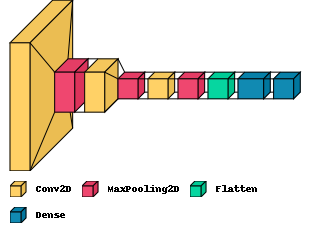

In [31]:
visualkeras.layered_view(clf, legend=True)

In [32]:
clf.fit(train_images, to_categorical(train_labels), epochs=10, batch_size=800)

Epoch 1/10
63/63 [==============================] - 11s 169ms/step - loss: 2.2968 - accuracy: 0.1184
Epoch 2/10
63/63 [==============================] - 11s 176ms/step - loss: 2.1759 - accuracy: 0.1909
Epoch 3/10
63/63 [==============================] - 11s 170ms/step - loss: 2.0914 - accuracy: 0.2281
Epoch 4/10
63/63 [==============================] - 10s 159ms/step - loss: 2.0409 - accuracy: 0.2467
Epoch 5/10
63/63 [==============================] - 10s 164ms/step - loss: 2.0005 - accuracy: 0.2611
Epoch 6/10
63/63 [==============================] - 10s 164ms/step - loss: 1.9510 - accuracy: 0.2781
Epoch 7/10
63/63 [==============================] - 11s 179ms/step - loss: 1.9011 - accuracy: 0.2999
Epoch 8/10
63/63 [==============================] - 11s 167ms/step - loss: 1.8612 - accuracy: 0.3146
Epoch 9/10
63/63 [==============================] - 10s 165ms/step - loss: 1.8154 - accuracy: 0.3316
Epoch 10/10
63/63 [==============================] - 11s 170ms/step - loss: 1.7763 - accura